## Data Exploration Majors 

In [122]:
## From Kaggle 'U.S Post College Salaries'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [123]:
!kaggle datasets download -d rathoddharmendra/post-college-salaries

Dataset URL: https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries
License(s): MIT
post-college-salaries.zip: Skipping, found more recently modified local copy (use --force to force download)


In [124]:
import zipfile

with zipfile.ZipFile("post-college-salaries.zip", "r") as zip_ref:
    zip_ref.extractall("post_college_salaries")

In [125]:
import os
os.listdir("post_college_salaries")

['final-post-college-salaries.csv', 'sample.csv']

In [126]:
df = pd.read_csv("post_college_salaries/final-post-college-salaries.csv")

In [127]:
df.head(5)

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,"$98,100","$212,100",60%
1,2,Operations Research & Industrial Engineering,Bachelors,"$101,200","$202,600",21%
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,"$128,500","$192,300",45%
3,4,Interaction Design,Bachelors,"$77,400","$178,800",55%
4,5,Building Science,Bachelors,"$71,100","$172,400",46%


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              763 non-null    int64 
 1   Major             763 non-null    object
 2   Degree Type       763 non-null    object
 3   Early Career Pay  763 non-null    object
 4   Mid-Career Pay    763 non-null    object
 5   % High Meaning    763 non-null    object
dtypes: int64(1), object(5)
memory usage: 35.9+ KB


In [129]:
#3 No null values!
df.isnull().sum()

Rank                0
Major               0
Degree Type         0
Early Career Pay    0
Mid-Career Pay      0
% High Meaning      0
dtype: int64

In [130]:
## Need to get rid off the $$ on both cloumns that have it
df['Early Career Pay'] = df['Early Career Pay'].str.replace(r'[$,]', '', regex=True)

In [131]:
## Got rid of the $
df['Early Career Pay']

0       98100
1      101200
2      128500
3       77400
4       71100
        ...  
758     42300
759     43900
760     47300
761     43400
762     45900
Name: Early Career Pay, Length: 763, dtype: object

In [132]:
## change to int or float, doesnt matter that much in this case
df['Early Career Pay'] = df['Early Career Pay'].astype(int)

In [133]:
## Check to see if it worked
print(df['Early Career Pay'].dtype)

int32


In [134]:
## Repeat Process
df['Mid-Career Pay'] = df['Mid-Career Pay'].str.replace(r'[$,]', '', regex=True)

In [135]:
df['Mid-Career Pay'] = df['Mid-Career Pay'].astype(int)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              763 non-null    int64 
 1   Major             763 non-null    object
 2   Degree Type       763 non-null    object
 3   Early Career Pay  763 non-null    int32 
 4   Mid-Career Pay    763 non-null    int32 
 5   % High Meaning    763 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 29.9+ KB


In [137]:
df.head(1)

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,98100,212100,60%


In [138]:
## Have to do the same with meaning column, but a bit different since it has percentages
df['% High Meaning'] = df['% High Meaning'].str.replace(r'[%,]', '', regex=True)

In [139]:
df['% High Meaning'].iloc[0]

'60'

In [140]:
print(df['% High Meaning'].dtype)

object


In [141]:
## Replace problematic values to NaN, this column was a bit trickier
df['% High Meaning'] = pd.to_numeric(df['% High Meaning'], errors='coerce')

In [142]:
df['% High Meaning'] = df['% High Meaning'].replace('-', pd.NA).astype(float)

In [143]:
## We can still make ti work as a float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              763 non-null    int64  
 1   Major             763 non-null    object 
 2   Degree Type       763 non-null    object 
 3   Early Career Pay  763 non-null    int32  
 4   Mid-Career Pay    763 non-null    int32  
 5   % High Meaning    708 non-null    float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 29.9+ KB


In [144]:
df.head(5)

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,98100,212100,60.0
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,21.0
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,45.0
3,4,Interaction Design,Bachelors,77400,178800,55.0
4,5,Building Science,Bachelors,71100,172400,46.0


In [145]:
## COver 100 to work with it
df['% High Meaning'] = df['% High Meaning']/100

In [146]:
## Checked and it worked
df['% High Meaning']

0      0.60
1      0.21
2      0.45
3      0.55
4      0.46
       ... 
758    0.50
759    0.73
760    0.78
761    0.78
762    0.36
Name: % High Meaning, Length: 763, dtype: float64

In [147]:
## Look at my dataset after conversion
df

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,98100,212100,0.60
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,0.21
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,0.45
3,4,Interaction Design,Bachelors,77400,178800,0.55
4,5,Building Science,Bachelors,71100,172400,0.46
...,...,...,...,...,...,...
758,759,Equine Studies,Bachelors,42300,54100,0.50
759,760,Nonprofit Administration,Bachelors,43900,53700,0.73
760,761,Addictions Counseling,Bachelors,47300,52400,0.78
761,762,Early Childhood Education,Bachelors,43400,52200,0.78


In [148]:
## Now, onto the ufn part, lets try to find some insights!
early_pay_by_major = df.groupby('Major')['Early Career Pay'].sum().sort_values(ascending = False)
early_pay_by_major

Major
Electrical Engineering & Computer Science (EECS)    128500
Operations Research & Industrial Engineering        101200
Petroleum Engineering                                98100
Nuclear Engineering Technology (NET)                 96500
Operations Research                                  94900
                                                     ...  
Child & Family Studies                               42900
Ministry                                             42700
Equine Studies                                       42300
Painting & Printmaking                               40500
Voice & Opera                                        39600
Name: Early Career Pay, Length: 763, dtype: int32

In [152]:
#3 Getting top 10 major by Early Career Pay and ascending as true so graph reads better
early_pay_by_major_top10 = early_pay_by_major.head(10).sort_values(ascending=True)
early_pay_by_major_top10

Major
Electrical & Computer Engineering (ECE)              91100
Robotics                                             91100
Computer Engineering (CE)                            92000
Metallurgical Engineering                            93200
Computer Science (CS) & Engineering                  93500
Operations Research                                  94900
Nuclear Engineering Technology (NET)                 96500
Petroleum Engineering                                98100
Operations Research & Industrial Engineering        101200
Electrical Engineering & Computer Science (EECS)    128500
Name: Early Career Pay, dtype: int32

In [160]:
## Converting into Dataframe
early_pay_by_major_top10 = early_pay_by_major.head(10).sort_values(ascending=True).reset_index()
early_pay_by_major_top10.columns

Index(['Major', 'Early Career Pay'], dtype='object')

In [150]:
## set white grid
sns.set_style('whitegrid')

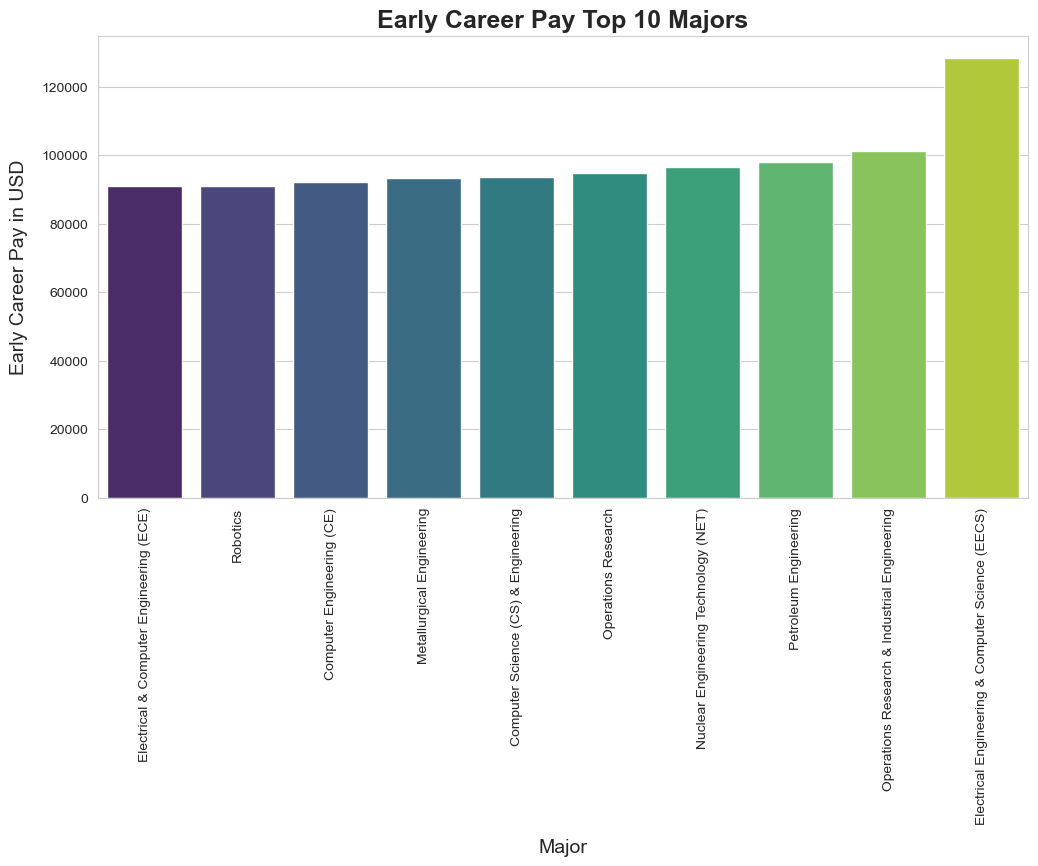

In [161]:
## Lets graph the earnings by major visually
plt.figure(figsize=(12,6))
sns.barplot(data=early_pay_by_major_top10, x='Major', y='Early Career Pay', palette='viridis')
plt.xticks(rotation = 90)
plt.title('Early Career Pay Top 10 Majors',fontsize = 18, fontweight = 'bold')
plt.xlabel('Major',fontsize = 14, labelpad = 10)
plt.ylabel('Early Career Pay in USD',fontsize = 14, labelpad = 10)
plt.show()

In [93]:
## Early Career Pay, worse paying college majors
early_pay_by_major_bottom10 = early_pay_by_major.tail(10).sort_values(ascending=False)
early_pay_by_major_bottom10

Major
Child Development          43400
Outdoor Education          43400
Legal Assistant Studies    43300
Deaf Studies               43300
Church Ministries          43300
Child & Family Studies     42900
Ministry                   42700
Equine Studies             42300
Painting & Printmaking     40500
Voice & Opera              39600
Name: Early Career Pay, dtype: int32

In [164]:
## Converting into Dataframe
early_pay_by_major_bottom10 = early_pay_by_major.tail(10).sort_values(ascending=True).reset_index()

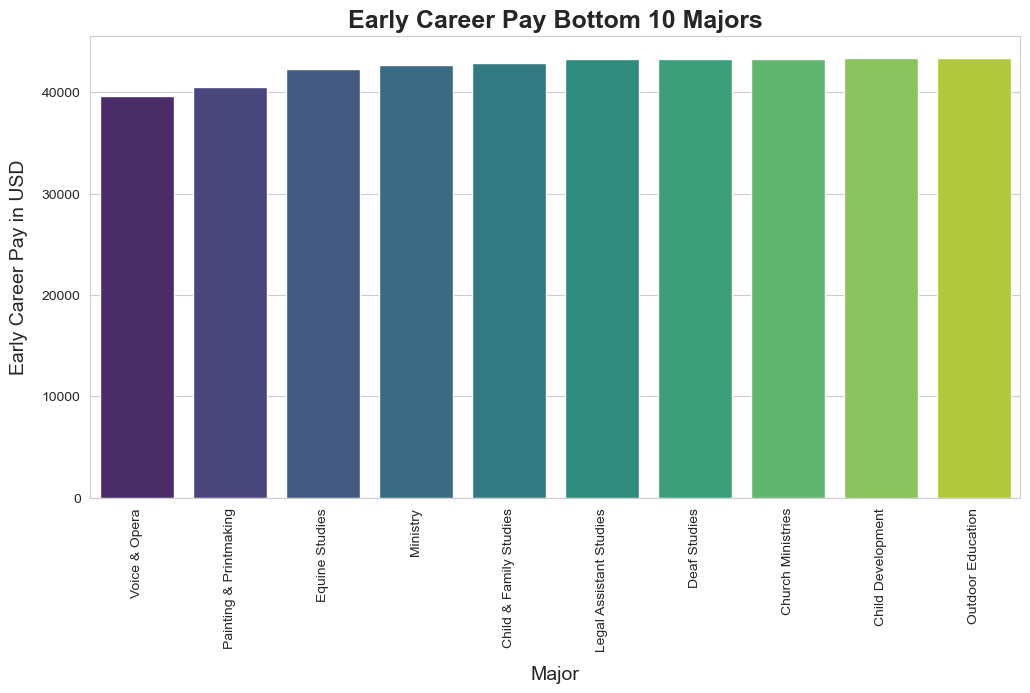

In [165]:
## Lets graph the earnings by major visually
plt.figure(figsize=(12,6))
sns.barplot(data=early_pay_by_major_bottom10, x='Major', y='Early Career Pay', palette='viridis')
plt.xticks(rotation = 90)
plt.title('Early Career Pay Bottom 10 Majors',fontsize = 18, fontweight = 'bold')
plt.xlabel('Major',fontsize = 14, labelpad = 10)
plt.ylabel('Early Career Pay in USD',fontsize = 14, labelpad = 10)
plt.show()

In [166]:
## Keep exploring Dataset
df

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,98100,212100,0.60
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,0.21
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,0.45
3,4,Interaction Design,Bachelors,77400,178800,0.55
4,5,Building Science,Bachelors,71100,172400,0.46
...,...,...,...,...,...,...
758,759,Equine Studies,Bachelors,42300,54100,0.50
759,760,Nonprofit Administration,Bachelors,43900,53700,0.73
760,761,Addictions Counseling,Bachelors,47300,52400,0.78
761,762,Early Childhood Education,Bachelors,43400,52200,0.78


In [167]:
## We are only working with Bachelors level data
df['Degree Type'].nunique()
df['Degree Type'].unique()

array(['Bachelors'], dtype=object)

In [168]:
## Which Major has the highest Meaning Level
meaning_major = df.groupby('Major')['% High Meaning'].mean()
meaning_major

Major
3D Animation                         0.43
Accounting                           0.42
Accounting & Auditing                0.42
Accounting & Business                0.49
Accounting & Computer Systems         NaN
                                     ... 
Women's Studies                      0.60
Workforce Education & Development    0.77
Writing                              0.45
Youth Ministry                       0.76
Zoology                              0.67
Name: % High Meaning, Length: 763, dtype: float64

In [169]:
## Some meaning Values are 0, which can't be
## I mean they could be, but Im going to remove them from my analysis to get the lowest ones
meaning_major.head()

Major
3D Animation                     0.43
Accounting                       0.42
Accounting & Auditing            0.42
Accounting & Business            0.49
Accounting & Computer Systems     NaN
Name: % High Meaning, dtype: float64

In [170]:
## Have to give columns names to drop where the value is 0 
meaning_major.head().sort_values(ascending = False)
## Dropped na values to graph
meaning_major.dropna()

Major
3D Animation                         0.43
Accounting                           0.42
Accounting & Auditing                0.42
Accounting & Business                0.49
Accounting & Economics               0.50
                                     ... 
Women's Studies                      0.60
Workforce Education & Development    0.77
Writing                              0.45
Youth Ministry                       0.76
Zoology                              0.67
Name: % High Meaning, Length: 708, dtype: float64

In [171]:
meaning_major.head().sort_values(ascending = False)

Major
Accounting & Business            0.49
3D Animation                     0.43
Accounting                       0.42
Accounting & Auditing            0.42
Accounting & Computer Systems     NaN
Name: % High Meaning, dtype: float64

In [172]:
## Dropping na values, this didnt work
meaning_major.isnull().sum()
meaning_major.dropna()
meaning_major.isnull().sum()

55

In [173]:
## I need to modify the actual Dataframe, this did work
meaning_major = meaning_major.dropna()
meaning_major.isnull().sum()

0

In [174]:
## Getting 10 Top Majors by Meaning
top10_Majors_meaning = meaning_major.nlargest(10)
top10_Majors_meaning

Major
Music Therapy                     0.95
Cardiopulmonary Science           0.92
Radiation Therapy                 0.91
Applied Behavior Analysis         0.88
Bachelor of Science in Nursing    0.88
Physical Therapy                  0.88
Bachelor in Science Nursing       0.87
Health Services Management        0.87
Medical Laboratory Science        0.86
Occupational Therapy (OT)         0.86
Name: % High Meaning, dtype: float64

In [176]:
## converting to Dataframe
top10_Majors_meaning = meaning_major.nlargest(10).sort_values(ascending=True).reset_index()

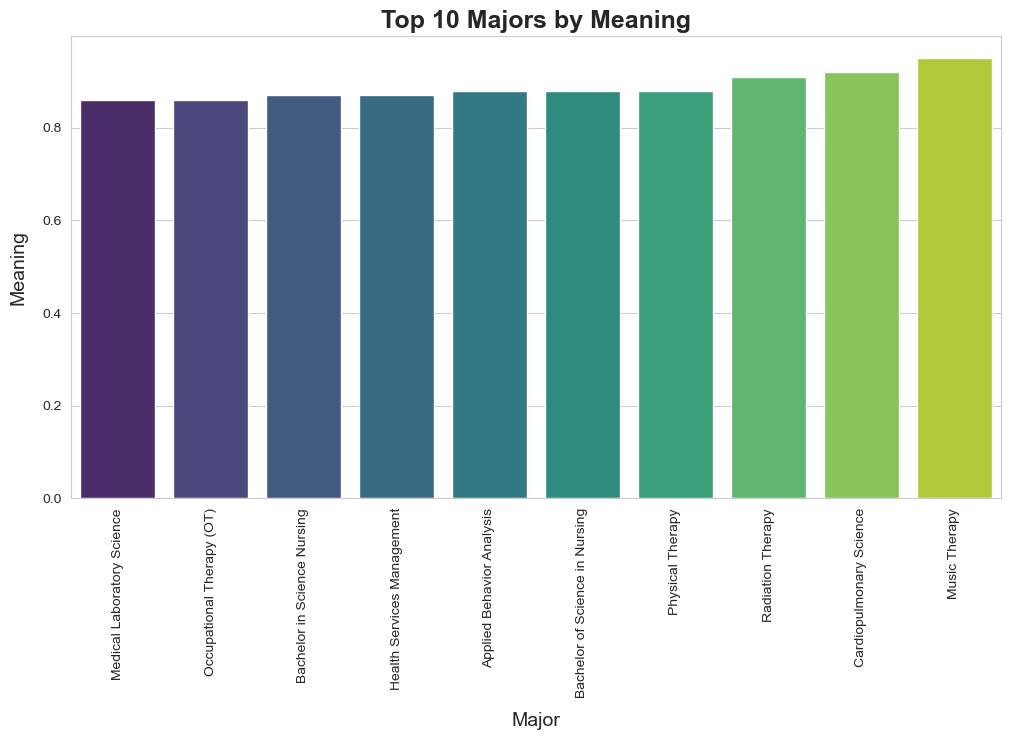

In [177]:
## Graphing Top 10 Majors by Meaning
plt.figure(figsize=(12,6))
sns.barplot(data=top10_Majors_meaning, x='Major', y='% High Meaning', palette='viridis')
plt.xticks(rotation = 90)
plt.title('Top 10 Majors by Meaning',fontsize = 18, fontweight = 'bold')
plt.xlabel('Major',fontsize = 14, labelpad = 10)
plt.ylabel('Meaning',fontsize = 14, labelpad = 10)
plt.show()

In [105]:
## Repeating process for bottom 10, I Flip it so its eassier to read
bottom10_Majors_meaning = meaning_major.nsmallest(10).sort_values(ascending=False)
bottom10_Majors_meaning

Major
Digital Media Design                            0.27
Fashion Marketing & Management                  0.27
International Business & Finance                0.27
Commercial Photography                          0.26
Retail & Consumer Science                       0.26
Textile & Apparel Studies                       0.24
International Trade & Business                  0.23
International Marketing                         0.21
Operations Research & Industrial Engineering    0.21
Japanese Studies                                0.18
Name: % High Meaning, dtype: float64

In [178]:
bottom10_Majors_meaning = meaning_major.nsmallest(10).sort_values(ascending=True).reset_index()

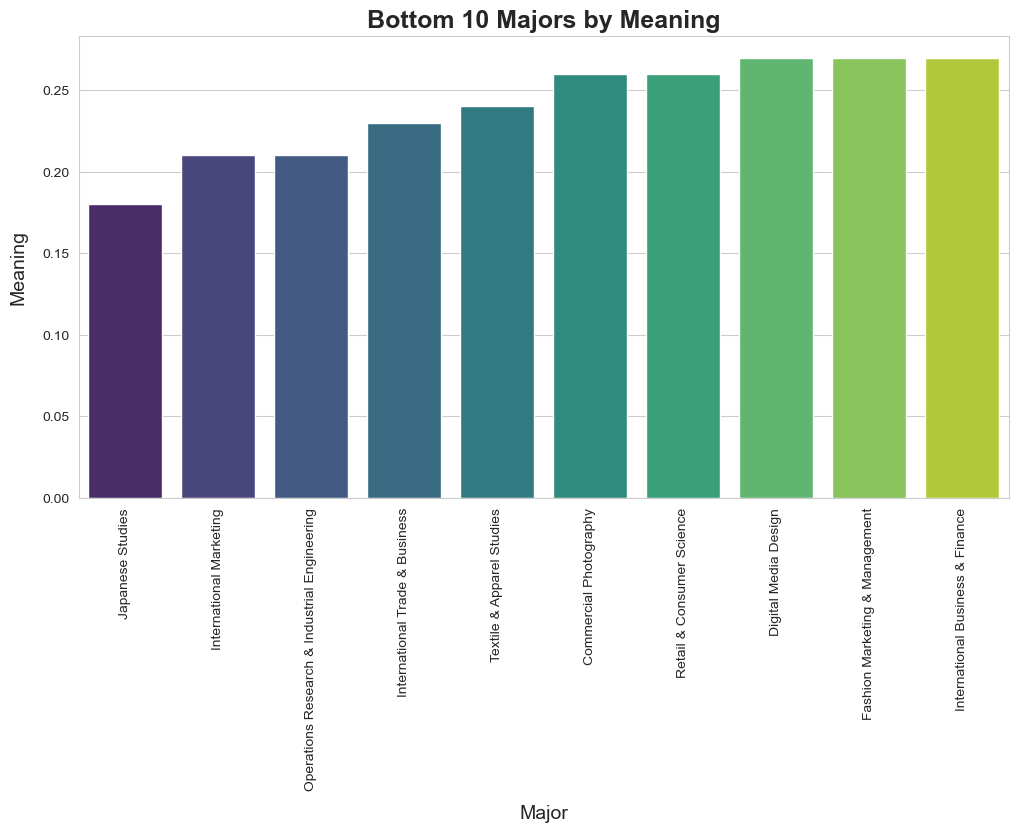

In [179]:
## Graphing Bottom 10 Majors by Meaning
plt.figure(figsize=(12,6))
sns.barplot(data=bottom10_Majors_meaning, x='Major', y='% High Meaning', palette='viridis')
plt.xticks(rotation = 90)
plt.title('Bottom 10 Majors by Meaning',fontsize = 18, fontweight = 'bold')
plt.xlabel('Major',fontsize = 14, labelpad = 10)
plt.ylabel('Meaning',fontsize = 14, labelpad = 10)
plt.show()

In [180]:
df

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,98100,212100,0.60
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,0.21
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,0.45
3,4,Interaction Design,Bachelors,77400,178800,0.55
4,5,Building Science,Bachelors,71100,172400,0.46
...,...,...,...,...,...,...
758,759,Equine Studies,Bachelors,42300,54100,0.50
759,760,Nonprofit Administration,Bachelors,43900,53700,0.73
760,761,Addictions Counseling,Bachelors,47300,52400,0.78
761,762,Early Childhood Education,Bachelors,43400,52200,0.78


In [181]:
## Difference from Early Career pay to Mid-Career could show progressions
df['Growth in Pay'] = df['Mid-Career Pay']- df['Early Career Pay']

In [182]:
df

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning,Growth in Pay
0,1,Petroleum Engineering,Bachelors,98100,212100,0.60,114000
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,0.21,101400
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,0.45,63800
3,4,Interaction Design,Bachelors,77400,178800,0.55,101400
4,5,Building Science,Bachelors,71100,172400,0.46,101300
...,...,...,...,...,...,...,...
758,759,Equine Studies,Bachelors,42300,54100,0.50,11800
759,760,Nonprofit Administration,Bachelors,43900,53700,0.73,9800
760,761,Addictions Counseling,Bachelors,47300,52400,0.78,5100
761,762,Early Childhood Education,Bachelors,43400,52200,0.78,8800


In [183]:
## Grouping Major by Career Pay
major_growth_pay = df.groupby('Major')['Growth in Pay'].sum()
major_growth_pay

Major
3D Animation                         32000
Accounting                           44100
Accounting & Auditing                46300
Accounting & Business                33300
Accounting & Computer Systems        29700
                                     ...  
Women's Studies                      26400
Workforce Education & Development    23100
Writing                              46700
Youth Ministry                       19700
Zoology                              40400
Name: Growth in Pay, Length: 763, dtype: int32

In [184]:
## Top 10 by Growth pay
top_10_growth_pay = major_growth_pay.nlargest(10)

In [185]:
top_10_growth_pay

Major
Petroleum Engineering                           114000
Interaction Design                              101400
Operations Research & Industrial Engineering    101400
Building Science                                101300
Actuarial Mathematics                            96300
Aerospace Studies                                93900
Foreign Affairs                                  92500
Public Accounting                                90700
Information & Computer Science                   89700
Applied Economics and Management                 88100
Name: Growth in Pay, dtype: int32

In [186]:
#3 Bottom 10 by Growth pay
bottom_10_growth_pay = major_growth_pay.nsmallest(10)

In [187]:
bottom_10_growth_pay

Major
Metalsmithing                  700
Addictions Counseling         5100
Horticulture & Agronomy       6500
Early Childhood Education     8800
Nonprofit Administration      9800
Middle School Education      10300
Mental Health                10400
Dental Hygiene               10600
Practical Nursing            11200
Equine Studies               11800
Name: Growth in Pay, dtype: int32

In [188]:
## I think havign the list is good enough, more interesting would be to know which grows more percentage wise
## Growth wise as a percentage
df['Percent Career Growth'] = ((df['Mid-Career Pay']- df['Early Career Pay'])/df['Early Career Pay'])*100

In [189]:
## It worked
df

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning,Growth in Pay,Percent Career Growth
0,1,Petroleum Engineering,Bachelors,98100,212100,0.60,114000,116.207951
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,0.21,101400,100.197628
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,0.45,63800,49.649805
3,4,Interaction Design,Bachelors,77400,178800,0.55,101400,131.007752
4,5,Building Science,Bachelors,71100,172400,0.46,101300,142.475387
...,...,...,...,...,...,...,...,...
758,759,Equine Studies,Bachelors,42300,54100,0.50,11800,27.895981
759,760,Nonprofit Administration,Bachelors,43900,53700,0.73,9800,22.323462
760,761,Addictions Counseling,Bachelors,47300,52400,0.78,5100,10.782241
761,762,Early Childhood Education,Bachelors,43400,52200,0.78,8800,20.276498


In [190]:
## Goruping as we've done before
percent_growth_major = df.groupby('Major')['Percent Career Growth'].sum()

In [191]:
percent_growth_major

Major
3D Animation                         54.794521
Accounting                           68.691589
Accounting & Auditing                68.491124
Accounting & Business                54.590164
Accounting & Computer Systems        38.174807
                                       ...    
Women's Studies                      50.285714
Workforce Education & Development    33.429812
Writing                              90.856031
Youth Ministry                       44.772727
Zoology                              83.817427
Name: Percent Career Growth, Length: 763, dtype: float64

In [195]:
## Defining variables
top10_percent_growth = percent_growth_major.nlargest(10)
bottom10_percent_growth = percent_growth_major.nsmallest(10).sort_values(ascending=False)

In [193]:
print(bottom10_percent_growth)

Major
Landscape Design                       20.898100
Middle School Education                20.641283
Early Childhood Education              20.276498
Electronic Systems Technology (EST)    17.988827
Diagnostic Medical Ultrasound          17.237009
Practical Nursing                      15.533981
Dental Hygiene                         12.709832
Addictions Counseling                  10.782241
Horticulture & Agronomy                10.708402
Metalsmithing                           1.525054
Name: Percent Career Growth, dtype: float64


In [196]:
print(top10_percent_growth)

Major
Aerospace Studies        145.581395
Building Science         142.475387
Foreign Affairs          141.871166
Organic Chemistry        137.743191
Actuarial Mathematics    135.252809
Bioscience               134.035656
Asian Studies            132.664234
Interaction Design       131.007752
Public Accounting        126.853147
Jazz Studies             125.078370
Name: Percent Career Growth, dtype: float64


In [ ]:
## Asian Studies was suprising as well as Jazz Studies
## Hope you enjoyed this small project